In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [0]:
#WRITE CODE HERE IMPORT THE DATA AS 'data'


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Copy of WEEK4.csv')

ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [0]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [6]:
# VIEWING THE DATA ONCE
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [0]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

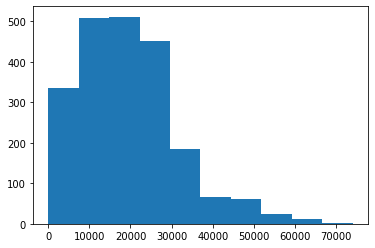

In [8]:
plt.hist(data['price']);

IT IS LEFT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

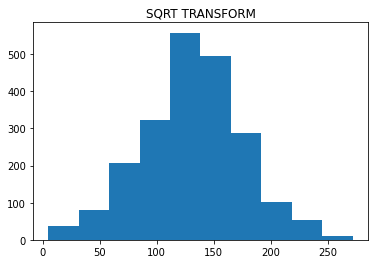

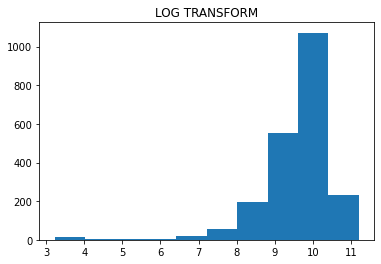

In [9]:
#WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [0]:
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)

In [0]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [12]:
#LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('\nExpected shapes')
print((1722, 25))
print((431, 25))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 25)
(431, 25)
(1722,)
(431,)

Expected shapes
(1722, 25)
(431, 25)
(1722,)
(431,)

Verify if they are matching


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
print("Linear Regression Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(Linreg.predict(X_test)))))

print("Linear Regression Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(Linreg.predict(X_test)))))

# End code

print("\n")
print("The correct values are :")


print('Linear Regression Training R2 score is 0.3577935806672855')
print('Linear Regression Testing R2 score is 0.33405970134102436')
print('Linear Regression Training mean_square_error is 90997459.24038002')
print('Linear Regression Testing mean_square_error is 93998879.06677869')
print('Linear Regression Training mean_absolute_error is 6864.980505017769')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017768
Linear Regression Testing mean_absolute_error is 6926.987292556893


The correct values are :
Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017769
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [15]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data


# START CODE
model = DecisionTreeRegressor(criterion='mse',max_depth=7,random_state=1)
model.fit(X_train,y_train)
print("DecisionTreeRegressor Training R2 score is " + str(r2_score(np.square(y_train),np.square(model.predict(X_train)))))
print("DecisionTreeRegressor Testing R2 score is " + str(r2_score(np.square(y_test),np.square(model.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

print("DecisionTreeRegressor Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(model.predict(X_train)))))
print("DecisionTreeRegressor Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(model.predict(X_test)))))

print("DecisionTreeRegressor Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(model.predict(X_train)))))
print("DecisionTreeRegressor Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(model.predict(X_test)))))
# END CODE

DecisionTreeRegressor Training R2 score is 0.422869230755335
DecisionTreeRegressor Testing R2 score is 0.36145560633416207
DecisionTreeRegressor Training mean_square_error is 81776562.90835412
DecisionTreeRegressor Testing mean_square_error is 90131889.2396716
DecisionTreeRegressor Training mean_absolute_error is 6266.244817595775
DecisionTreeRegressor Testing mean_absolute_error is 6846.025816839579


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [16]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
svrmodel = SVR(kernel='poly', degree=2, C=0.1, max_iter=3000)
svrmodel.fit(X_train,y_train)

print("SVR Training R2 score is " + str(r2_score(np.square(y_train),np.square(svrmodel.predict(X_train)))))
print("SVR Testing R2 score is " + str(r2_score(np.square(y_test),np.square(svrmodel.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

print("SVR Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(svrmodel.predict(X_train)))))
print("SVR Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(svrmodel.predict(X_test)))))

print("SVR Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(svrmodel.predict(X_train)))))
print("SVR Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(svrmodel.predict(X_test)))))
# END CODE

SVR Training R2 score is -21.378337117720697
SVR Testing R2 score is 0.0879391173112708
SVR Training mean_square_error is 3170899197.5713468
SVR Testing mean_square_error is 128739319.10418974
SVR Training mean_absolute_error is 9831.444528754593
SVR Testing mean_absolute_error is 8348.703212635415


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [20]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 

# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
rfmodel = RandomForestRegressor(n_estimators=200, max_depth=9, n_jobs=-1, random_state=1)
rfmodel.fit(X_train, y_train)
print("Random forest Training R2 score is " + str(r2_score(np.square(y_train),np.square(rfmodel.predict(X_train)))))
print("Random forest Testing R2 score is " + str(r2_score(np.square(y_test),np.square(rfmodel.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

print("Random forest Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(rfmodel.predict(X_train)))))
print("Random forest Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(rfmodel.predict(X_test)))))

print("Random forest Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(rfmodel.predict(X_train)))))
print("Random forest Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(rfmodel.predict(X_test)))))
# END CODE

Random forest Training R2 score is 0.5524364393379151
Random forest Testing R2 score is 0.3997413290406362
Random forest Training mean_square_error is 63417533.12143005
Random forest Testing mean_square_error is 84727778.65210524
Random forest Training mean_absolute_error is 5528.669046457424
Random forest Testing mean_absolute_error is 6695.668840563838


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [21]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [0]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1


In [23]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [0]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [39]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1 
# FIT Logistic Regression ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
logisticRegr = LogisticRegression(penalty='l2', C=0.5, random_state=1, solver='lbfgs', max_iter=2000)
logisticRegr.fit(X_train, y_train)

#training
predictions = logisticRegr.predict(X_train)
cm = confusion_matrix(y_train, predictions)
print(cm)
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]

print('TPR for train data', TP/(TP+FN))

#testing
predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]

print('Accuracy', (TP+TN)/(TP+TN+FP+FN))
print('Sensititvity or TPR', TP/(FN+TP))
print('Specificity or TNR', TN/(TN+FP))
print('Classification Error', (FP+FN)/(TP+TN+FP+FN))
print('False positive rate', FP/(TN+FP))

[[782 231]
 [248 461]]
TPR for train data 0.6502115655853314
[[188  55]
 [ 65 123]]
Accuracy 0.7215777262180975
Sensititvity or TPR 0.6542553191489362
Specificity or TNR 0.7736625514403292
Classification Error 0.27842227378190254
False positive rate 0.22633744855967078


In [40]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
# FIT SVM ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR SVM
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
svcmodel = SVC(kernel='rbf', gamma='scale', max_iter=1000, random_state=1)
svcmodel.fit(X_train,y_train)

#training data
y_predd = svcmodel.predict(X_train) 
cm = confusion_matrix(y_train,y_predd) 
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]
print('Accuracy', (TP+TN)/(TP+TN+FP+FN))
print('Sensititvity or TPR', TP/(FN+TP))
print('Specificity or TNR', TN/(TN+FP))
print('Classification Error', (FP+FN)/(TP+TN+FP+FN))
print('False positive rate', FP/(TN+FP))

#testing data
y_predd = svcmodel.predict(X_test) 
cm = confusion_matrix(y_test,y_predd) 
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]
print('Accuracy', (TP+TN)/(TP+TN+FP+FN))
print('Sensititvity or TPR', TP/(FN+TP))
print('Specificity or TNR', TN/(TN+FP))
print('Classification Error', (FP+FN)/(TP+TN+FP+FN))
print('False positive rate', FP/(TN+FP))
# END CODE


Accuracy 0.7090592334494773
Sensititvity or TPR 0.5063469675599436
Specificity or TNR 0.8509378084896347
Classification Error 0.29094076655052264
False positive rate 0.14906219151036526
Accuracy 0.7192575406032483
Sensititvity or TPR 0.5372340425531915
Specificity or TNR 0.8600823045267489
Classification Error 0.28074245939675174
False positive rate 0.13991769547325103


In [41]:

# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
# FIT Decision Tree ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Decision Tree
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
dtcmodel = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtcmodel.fit(X_train,y_train)

#training data
y_pred = dtcmodel.predict(X_train) 
cm = confusion_matrix(y_train,y_pred)
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]
print('Accuracy', (TP+TN)/(TP+TN+FP+FN))
print('Sensititvity or TPR', TP/(FN+TP))
print('Specificity or TNR', TN/(TN+FP))
print('Classification Error', (FP+FN)/(TP+TN+FP+FN))
print('False positive rate', FP/(TN+FP))

#testing data
y_pred = dtcmodel.predict(X_test) 
cm = confusion_matrix(y_test,y_pred) 
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]
print('Accuracy', (TP+TN)/(TP+TN+FP+FN))
print('Sensititvity or TPR', TP/(FN+TP))
print('Specificity or TNR', TN/(TN+FP))
print('Classification Error', (FP+FN)/(TP+TN+FP+FN))
print('False positive rate', FP/(TN+FP)) 

# END CODE

Accuracy 0.7398373983739838
Sensititvity or TPR 0.5430183356840621
Specificity or TNR 0.8775913129318855
Classification Error 0.2601626016260163
False positive rate 0.12240868706811452
Accuracy 0.7447795823665894
Sensititvity or TPR 0.5638297872340425
Specificity or TNR 0.8847736625514403
Classification Error 0.2552204176334107
False positive rate 0.11522633744855967


In [43]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
# FIT RANDOM FOREST ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Random Forest
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
rfcmodel=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=1)
rfcmodel.fit(X_train,y_train)

#training data
y_pred = rfcmodel.predict(X_train) 
cm = confusion_matrix(y_train,y_pred)
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]
print('Accuracy', (TP+TN)/(TP+TN+FP+FN))
print('Sensititvity or TPR', TP/(FN+TP))
print('Specificity or TNR', TN/(TN+FP))
print('Classification Error', (FP+FN)/(TP+TN+FP+FN))
print('False positive rate', FP/(TN+FP))

#testing data
y_pred = rfcmodel.predict(X_test) 
cm = confusion_matrix(y_test,y_pred) 
TP, TN = cm[1,1], cm[0,0]
FP, FN = cm[0,1], cm[1,0]
print('Accuracy', (TP+TN)/(TP+TN+FP+FN))
print('Sensititvity or TPR', TP/(FN+TP))
print('Specificity or TNR', TN/(TN+FP))
print('Classification Error', (FP+FN)/(TP+TN+FP+FN))
print('False positive rate', FP/(TN+FP)) 
# END CODE

Accuracy 0.7415795586527294
Sensititvity or TPR 0.5444287729196051
Specificity or TNR 0.8795656465942744
Classification Error 0.2584204413472706
False positive rate 0.12043435340572557
Accuracy 0.7424593967517401
Sensititvity or TPR 0.5638297872340425
Specificity or TNR 0.8806584362139918
Classification Error 0.25754060324825984
False positive rate 0.11934156378600823
